In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [11]:
data = pd.read_csv("Dataset/cardio_train.csv", delimiter = ";")

In [12]:
data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
data.shape

(70000, 13)

In [14]:
print(data.columns.values)


['id' 'age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol'
 'gluc' 'smoke' 'alco' 'active' 'cardio']


In [15]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [16]:
data['age'] = data['age'] / 365
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [17]:
data['age'] = data['age'].astype(int)

In [18]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [19]:
#EDA
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<AxesSubplot:>

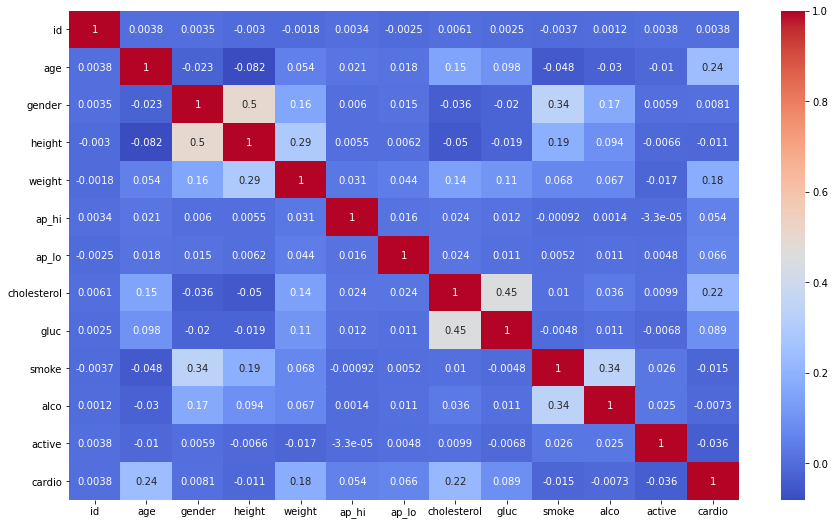

In [20]:
corr = data.corr()
plt.figure(figsize =(15,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

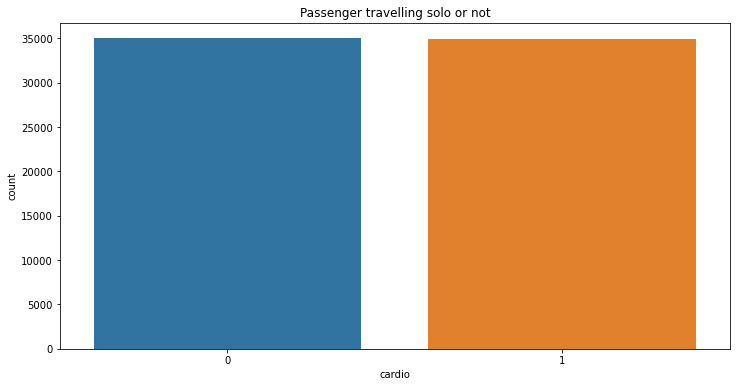

In [21]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=data, x='cardio')
plt.title('Passenger travelling solo or not')
#plt.ylim([0,3000])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

In [ ]:
# Figure size
plt.figure(figsize=(15,6))

# Histogram
sns.histplot(data=data, x='age', hue='cardio', binwidth=1, kde=True)

# Aesthetics
plt.title('Distribution')
plt.xlabel('Age(years)')
plt.show()

In [ ]:
sns.boxplot(x="cardio", y="age",               
data=data)
plt.title('.')
plt.show()

In [ ]:
df_categorical = data.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data = pd.melt(df_categorical));

In [ ]:
df_long = pd.melt(data, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

In [22]:
print('Train columns with null values:\n', data.isnull().sum())

Train columns with null values:
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [23]:
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003814,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003814,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,0.003502,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [24]:
X, y = data.drop('cardio', axis=1), data[['cardio']]

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.0499, random_state=43, stratify=y)

In [26]:
model_dict = {}

In [27]:
# Kneighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_knn = accuracy_score(y_val, y_pred)
model_dict['kneighbors_classifier'] = accuracy_knn
print(accuracy_knn)

C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6584597766962497


In [28]:
# Logistic Regression
classifier = LogisticRegression(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_log_reg = accuracy_score(y_val, y_pred)
model_dict['logistic_regression'] = accuracy_log_reg
print(accuracy_log_reg)

C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6979673632980247


In [29]:
#Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_rfc = accuracy_score(y_val, y_pred)
model_dict['random_forest_classifier'] = accuracy_rfc
print(accuracy_rfc)

<ipython-input-29-967bc8fc0522>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  predictor = classifier.fit(X_train, y_train)


0.7348983681649013


In [30]:
# Gradient Boosting 
X = np.array(X_train.drop(['cardio'],axis=1))
y = np.array(train['cardio'])
X_test = np.array(test.drop(['cardio'],axis=1))
y_act = test['cardio']

from  xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X,y)
print(f'Train Score: {xgb.score(X,y)}')

y_pred = xgb.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_act,y_pred)}')

NameError: name 'train' is not defined